In [14]:
import pandas as pd
import matplotlib.pylab as plb
from glob import glob
import cv2

In [15]:
cat_files = glob('c:/Data/data/animals/animals/cat/*.jpg')
dog_files = glob('c:/Data/data/animals/animals/dog/*.jpg')

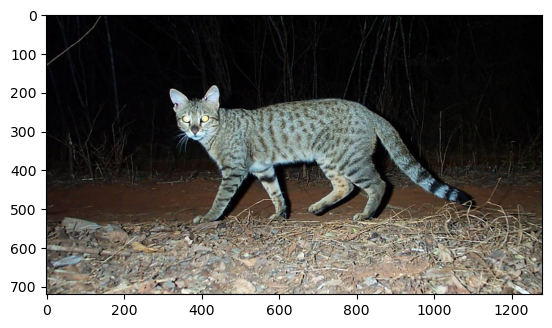

In [16]:
img = plb.imread(cat_files[9])
plb.imshow(img)

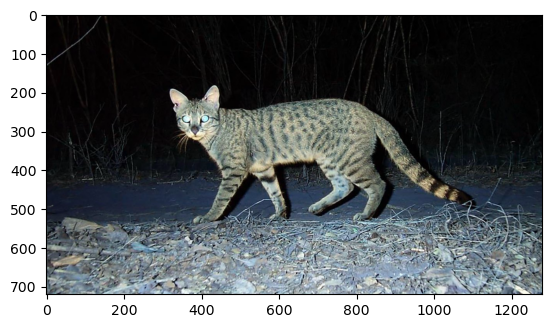

In [17]:
_img = cv2.imread(cat_files[9])
plb.imshow(_img)

In [26]:
#feature extraction
import numpy as np
from skimage.feature import hog
from skimage import data, exposure

In [27]:
# change to grayscale
_img = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)

error: OpenCV(4.8.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xa7e5ea26::Set<1,-1,-1>,struct cv::impl::A0xa7e5ea26::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [28]:
# extract hog features
fd, hog_image = hog(_img, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

In [21]:
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

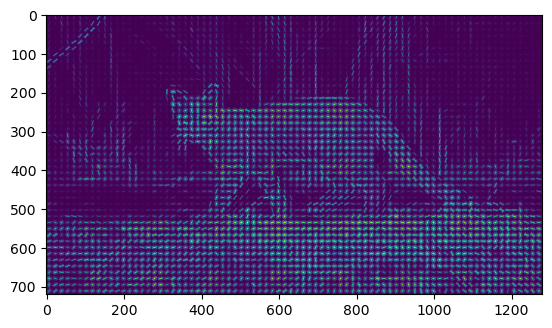

In [22]:
plb.imshow(hog_image_rescaled)

In [23]:
hog_image_rescaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
#object detection
from skimage.feature import hog
from skimage import data, exposure
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [30]:
# load data
lfw_people = fetch_lfw_people(min_faces_per_person=10, resize=0.4)

In [31]:
# extract hog features
fd, hog_image = hog(lfw_people.images[0], orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

In [24]:
# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

In [25]:
hog_image_rescaled

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
plb.imshow(hog_image_rescaled)

NameError: name 'plb' is not defined

In [32]:
lfw_people.data.shape

(111, 1850)

In [13]:
lfw_people.target

array([3, 0, 0, 3, 2, 2, 1, 1, 4, 0, 3, 3, 0, 3, 1, 3, 1, 3, 4, 1, 0, 1,
       2, 1, 1, 1, 1, 3, 1, 1, 4, 4, 0, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       4, 1, 2, 0, 1, 2, 3, 1, 1, 4, 4, 1, 0, 4, 1, 1, 3, 1, 0, 1, 1, 3,
       0, 4, 4, 4, 1, 1, 4, 1, 3, 2, 4, 4, 1, 2, 1, 4, 2, 3, 1, 4, 2, 2,
       4, 1, 1, 4, 0, 1, 1, 0, 1, 3, 4, 3, 3, 3, 4, 1, 2, 3, 4, 1, 4, 1,
       4], dtype=int64)

In [11]:
# split data
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, random_state=0)


In [12]:
# train model
clf = LinearSVC()
clf.fit(X_train, y_train)

C:\Users\davan\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\davan\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [65]:
# predict
y_pred = clf.predict(X_test)

In [66]:
# evaluate
print(classification_report(y_test, y_pred, target_names=lfw_people.target_names))

                         precision    recall  f1-score   support

         George HW Bush       0.00      0.00      0.00         3
Gloria Macapagal Arroyo       0.92      1.00      0.96        12
           Gordon Brown       1.00      1.00      1.00         2
     Michael Schumacher       0.60      1.00      0.75         6
            Tiger Woods       1.00      0.60      0.75         5

               accuracy                           0.82        28
              macro avg       0.70      0.72      0.69        28
           weighted avg       0.77      0.82      0.78        28


C:\Users\davan\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\davan\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\davan\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [67]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 0  1  0  2  0]
 [ 0 12  0  0  0]
 [ 0  0  2  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  2  3]]


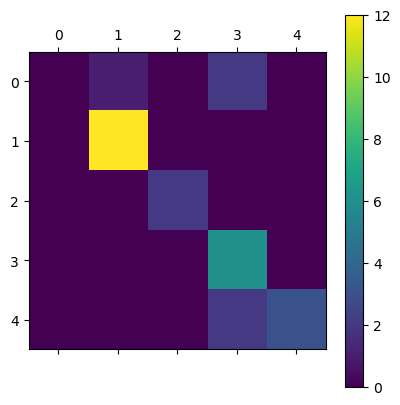

In [68]:
# plot confusion matrix
plb.matshow(cm)
plb.colorbar()
plb.show()